## Generate text version Vietnamese.

In [157]:
import pandas as pd
 
df = pd.read_csv("../data/crawl_data_202303041834.csv")

list_content_train = df['content'].tolist()

In [158]:
from underthesea import word_tokenize, sent_tokenize
def clean_text(text):
    text = str(text).lower() # lowercase text
    # text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    # text = BAD_SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    return text

def stemSentence(doc):
    sentences = word_tokenize(str(doc), format="text")
    return sentences

contents = df['content'].values.tolist()
contents = list(map(lambda x: stemSentence(x), contents))
print('contents', contents[0])

contents Loạt idol đọ dáng khét_lẹt với nội y : Jennie gây bão truyền_thông , nhưng chưa chắc đã gắt như đàn chị U40_Hà_Trần , Theo Thể_thao & Văn_hóa 07 : 07 01/03/2023 Không hẹn mà gặp , hội idol_Kpop thi nhau đốt mắt dân_tình với body nóng_bỏng bên nội y Calvin_Klein . Idol_Kpop giúp nhãn hàng xa_xỉ " chốt đơn " ầm_ầm : Jennie giúp dây_chuyền 1,8 tỷ cháy hàng , áo_lông hơn 300 triệu của Rosé fan cũng mua sạch Nhìn hội idol_Kpop thi nhau diện đồ ngắn khoe cơ bụng số 11 mà chị_em chỉ muốn đi tập ngay và luôn ! 4 lần stylist Hàn chế áo cho idol từ những thứ siêu nhỏ : Đa_phần được khen nhưng khiến dân_tình nổi đóa vì đi quá giới_hạn Thời_gian gần đây , Calvin_Klein trở_thành thương_hiệu phủ_sóng cõi mạng nhờ màn lăng_xê nhiệt_tình từ các idol Kpop . Khởi_đầu là fashion icon đỉnh nhất xứ kim_chi - Jennie với bộ ảnh quảng_cáo cho chiến_dịch Xuân_Hè 2023 gây bão cõi mạng . Tiếp sau đó là nhiều lứa idol từ gen 2 cho đến gen 4 tiếp_tục khoe dáng với nội y của Calvin_Klein , tạo nên đường đu

In [159]:
import re

def is_vietnamese(s):
    regex_pattern = r'[a-z0-9A-Z_ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚĂĐĨŨƠàáâãèéêìíòóôõùúăđĩũơƯĂẠẢẤẦẨẪẬẮẰẲẴẶẸẺẼỀỀỂưăạảấầẩẫậắằẳẵặẹẻẽềềểỄỆỈỊỌỎỐỒỔỖỘỚỜỞỠỢỤỦỨỪễếệỉịọỏốồổỗộớờởỡợụủứừỬỮỰỲỴÝỶỸửữựỳỵỷỹ]'
    return re.match(regex_pattern, s) is not None

print('is_vietnamese', is_vietnamese('07'))
def remove_larger_character(t):
    if len(t) > 10 or len(t) == 1 or t.isspace() or not is_vietnamese(t):
        return None
    else:
        return ' '.join(t.split('_'))

def santilize(x):
    t = x.split(' ')
    results = list(map(remove_larger_character, t))
    new_list = [item for item in results if item is not None]
    return new_list
content_tokens = list(map(santilize, contents))
print('content_tokens', content_tokens[0])


is_vietnamese True
content_tokens ['Loạt', 'idol', 'đọ', 'dáng', 'khét lẹt', 'với', 'nội', 'Jennie', 'gây', 'bão', 'nhưng', 'chưa', 'chắc', 'đã', 'gắt', 'như', 'đàn', 'chị', 'Theo', 'Thể thao', 'Văn hóa', '07', '07', '01/03/2023', 'Không', 'hẹn', 'mà', 'gặp', 'hội', 'idol Kpop', 'thi', 'nhau', 'đốt', 'mắt', 'dân tình', 'với', 'body', 'nóng bỏng', 'bên', 'nội', 'Idol Kpop', 'giúp', 'nhãn', 'hàng', 'xa xỉ', 'chốt', 'đơn', 'ầm ầm', 'Jennie', 'giúp', 'dây chuyền', '1,8', 'tỷ', 'cháy', 'hàng', 'áo lông', 'hơn', '300', 'triệu', 'của', 'Rosé', 'fan', 'cũng', 'mua', 'sạch', 'Nhìn', 'hội', 'idol Kpop', 'thi', 'nhau', 'diện', 'đồ', 'ngắn', 'khoe', 'cơ', 'bụng', 'số', '11', 'mà', 'chị em', 'chỉ', 'muốn', 'đi', 'tập', 'ngay', 'và', 'luôn', 'lần', 'stylist', 'Hàn', 'chế', 'áo', 'cho', 'idol', 'từ', 'những', 'thứ', 'siêu', 'nhỏ', 'Đa phần', 'được', 'khen', 'nhưng', 'khiến', 'dân tình', 'nổi', 'đóa', 'vì', 'đi', 'quá', 'giới hạn', 'Thời gian', 'gần', 'đây', 'trở thành', 'phủ sóng', 'cõi', 'mạng', 'nh

In [160]:
from transformers import AutoTokenizer, AutoModelWithLMHead
modelMaskedLM = AutoModelWithLMHead.from_pretrained('NlpHUST/gpt2-vietnamese')
tokenizerVI = AutoTokenizer.from_pretrained('NlpHUST/gpt2-vietnamese')

/Users/ngocp/.pyenv/versions/3.10.3/lib/python3.10/site-packages/transformers/models/auto/modeling_auto.py:1248: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
loading configuration file config.json from cache at /Users/ngocp/.cache/huggingface/hub/models--NlpHUST--gpt2-vietnamese/snapshots/65818d14816b42be09e2201933bf07106d9a2647/config.json
Model config GPT2Config {
  "_name_or_path": "NlpHUST/gpt2-vietnamese",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.0,
  "bos_token_id": 50256,
  "embd_pdrop": 0.0,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 

In [161]:
# Tokenize a sentence
block_size = 300
sentence = "Sáng 26/2 , lãnh_đạo Đội tuần_tra kiểm_soát giao_thông đường_bộ cao_tốc số 6."
encoded_dict = tokenizerVI.encode_plus(sentence, add_special_tokens=True, truncation=True, max_length=block_size)

# Print the tokenized sentence
print(encoded_dict)

{'input_ids': [3635, 2611, 19, 22, 997, 1532, 67, 8407, 3526, 1550, 67, 4973, 1188, 67, 3417, 462, 908, 67, 7982, 755, 67, 9074, 592, 67, 25131, 453, 890, 18], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [162]:
def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

sentence_tokens = flatten_list(content_tokens)
print('sentence_tokens', set(sentence_tokens[0:30]))
new_tokens = set(sentence_tokens) - set(tokenizerVI.get_vocab().keys())
print('length before add:', len(tokenizerVI.vocab))
tokenizerVI.add_tokens(list(new_tokens))
print('length after add:', len(tokenizerVI.vocab))
modelMaskedLM.resize_token_embeddings(len(tokenizerVI)+1)

sentence_tokens {'01/03/2023', '07', 'dáng', 'idol', 'Theo', 'nhưng', 'hẹn', 'Văn hóa', 'gắt', 'chưa', 'Thể thao', 'với', 'đàn', 'Không', 'đã', 'gây', 'đọ', 'bão', 'hội', 'gặp', 'mà', 'khét lẹt', 'Loạt', 'idol Kpop', 'chắc', 'Jennie', 'chị', 'như', 'nội'}
length before add: 50258
length after add: 64136


Embedding(64137, 768)

54322
[('tríSố', 53628), ('vô tận', 62165), ('Nguyễn Du', 50381), ('Tình Ca', 50832), ('điển trai', 51968), ('trailer', 61615), ('Văn Hóa 15', 57261), ('ôn hòa', 62854), ('Trần Khi', 53507), ('hòa hợp', 61792), ('1.700', 55746), ('Hậu Phật', 54737), ('vùi', 63768), ('vừa qua', 56360), ('điểu', 53199), ('VIB hướng', 62281), ('sung túc', 58644), ('tội', 57391), ('Đàn', 55136), ('tuổi thọ', 60585), ('bằng chứng', 52791), ('đô la', 61585), ('Ngọc Oanh', 51664), ('địa hạt', 53490), ('nhuộm màu', 55603), ('ngoại lai', 50808), ('trưng', 61729), ('trình diện', 63885), ('Dầu Tiếng', 51541), ('tích góp', 55307), ('dung nạp', 52715), ('Khác', 59936), ('thông tấn', 56756), ('Lý do', 60483), ('cao độ', 58040), ('tiễn biệt', 53561), ('phôi', 54391), ('gạch', 54576), ('Bà Rịa', 59703), ('Làm', 58909), ('đội ngũ', 55492), ('hạnh kiểm', 64018), ('nạn nhân', 53620), ('TàiCát', 54762), ('sáng kiến', 59158), ('Bình', 56207), ('hội nghị', 57157), ('anh chàng', 53849), ('mai táng', 52576), ('Liên hiệp', 591

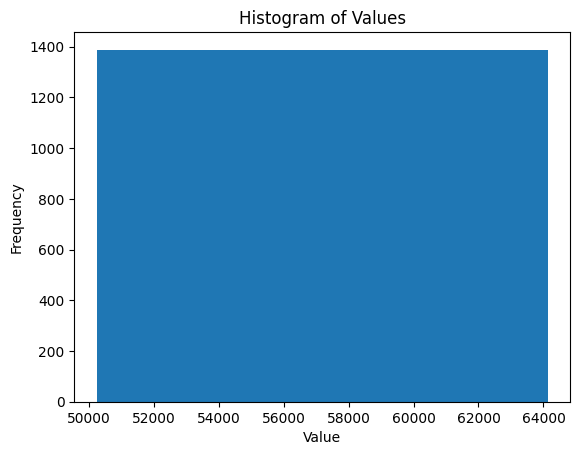

The range of values is 13878.0.


In [163]:
import pandas as pd
import matplotlib.pyplot as plt

print(tokenizerVI.get_vocab()['Tú Oanh'])
vocabAdded = tokenizerVI.get_added_vocab()
print(list(vocabAdded.items()))
df = pd.DataFrame(list(vocabAdded.items()), columns=['key', 'value'])

print(df)

# Get the summary statistics of the 'value' column
stats = df['value'].describe()

# Calculate the range of values
value_range = stats['max'] - stats['min']

# Plot a histogram of the 'value' column
plt.hist(df['value'], bins=10)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

print(f"The range of values is {value_range}.")

In [164]:
# Open the file in write mode
with open("../data/news_output.txt", "w") as file:
    # Truncate the file to the current position of the file pointer
    file.truncate()

print(content_tokens[:20])
with open("../data/news_output.txt", "w") as file:
    for t in content_tokens[:2]:
        file.write(' '.join(t) + "\n")

tokenizerVI.add_special_tokens({'pad_token': '[PAD]'})


Assigning [PAD] to the pad_token key of the tokenizer


[['Loạt', 'idol', 'đọ', 'dáng', 'khét lẹt', 'với', 'nội', 'Jennie', 'gây', 'bão', 'nhưng', 'chưa', 'chắc', 'đã', 'gắt', 'như', 'đàn', 'chị', 'Theo', 'Thể thao', 'Văn hóa', '07', '07', '01/03/2023', 'Không', 'hẹn', 'mà', 'gặp', 'hội', 'idol Kpop', 'thi', 'nhau', 'đốt', 'mắt', 'dân tình', 'với', 'body', 'nóng bỏng', 'bên', 'nội', 'Idol Kpop', 'giúp', 'nhãn', 'hàng', 'xa xỉ', 'chốt', 'đơn', 'ầm ầm', 'Jennie', 'giúp', 'dây chuyền', '1,8', 'tỷ', 'cháy', 'hàng', 'áo lông', 'hơn', '300', 'triệu', 'của', 'Rosé', 'fan', 'cũng', 'mua', 'sạch', 'Nhìn', 'hội', 'idol Kpop', 'thi', 'nhau', 'diện', 'đồ', 'ngắn', 'khoe', 'cơ', 'bụng', 'số', '11', 'mà', 'chị em', 'chỉ', 'muốn', 'đi', 'tập', 'ngay', 'và', 'luôn', 'lần', 'stylist', 'Hàn', 'chế', 'áo', 'cho', 'idol', 'từ', 'những', 'thứ', 'siêu', 'nhỏ', 'Đa phần', 'được', 'khen', 'nhưng', 'khiến', 'dân tình', 'nổi', 'đóa', 'vì', 'đi', 'quá', 'giới hạn', 'Thời gian', 'gần', 'đây', 'trở thành', 'phủ sóng', 'cõi', 'mạng', 'nhờ', 'màn', 'lăng xê', 'nhiệt tình

1

In [165]:
print(tokenizerVI.get_vocab()['y học'])
max_seq_length = 512
encoded_texts = [tokenizerVI.encode(text, truncation=True, max_length=max_seq_length) for text in contents]
print(encoded_texts[:2])

58264
[[52902, 225, 53786, 225, 58013, 225, 55563, 279, 53694, 67, 80, 3321, 225, 59967, 225, 62451, 573, 1315, 225, 53830, 225, 50279, 225, 54613, 225, 51719, 67, 60789, 997, 225, 55940, 225, 51362, 225, 51843, 225, 57292, 225, 52268, 225, 58105, 225, 54334, 225, 62383, 899, 2659, 67, 50724, 67, 63257, 997, 1812, 3400, 67, 19745, 1956, 225, 62891, 67, 54335, 4226, 1315, 4226, 225, 63438, 225, 51150, 225, 51509, 225, 56226, 225, 55837, 997, 225, 62752, 225, 53786, 67, 61525, 912, 875, 225, 57082, 225, 53161, 225, 55660, 67, 51673, 225, 59967, 8618, 225, 62386, 67, 60027, 225, 52819, 225, 62451, 573, 225, 59871, 67, 52135, 1204, 12595, 67, 61525, 225, 59595, 225, 58473, 225, 58918, 1353, 67, 92, 451, 879, 225, 50280, 225, 55339, 879, 225, 51126, 67, 51126, 1315, 225, 53830, 225, 59595, 225, 52579, 67, 53859, 225, 55104, 225, 62155, 225, 59279, 225, 58918, 997, 225, 54346, 67, 59065, 225, 55267, 2976, 225, 51050, 225, 54847, 225, 57170, 3919, 225, 52142, 847, 225, 62817, 225, 54756, 225,

In [174]:
from transformers import LineByLineTextDataset, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

# training_data = LineByLineTextDataset(
#     tokenizer=tokenizerVI,
#     file_path='../data/news_output.txt',
#     block_size=1024,
# )

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizerVI, mlm=False, mlm_probability=0.15
)

training_args = TrainingArguments(
    output_dir="./results-text",
    overwrite_output_dir=True,
    num_train_epochs=12,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=8,
    warmup_steps=1000,
    logging_steps=500,
)

trainer = Trainer(
    model=modelMaskedLM,
    args=training_args,
    train_dataset=encoded_texts,
    data_collator=data_collator
)

trainer.train()


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 2
  Num Epochs = 12
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 12
  Number of trainable parameters = 135099648


  0%|          | 0/12 [00:00<?, ?it/s]



Training completed. Do not forget to share your model on huggingface.co/models =)




{'train_runtime': 38.6433, 'train_samples_per_second': 0.621, 'train_steps_per_second': 0.311, 'train_loss': 6.866919835408528, 'epoch': 12.0}


TrainOutput(global_step=12, training_loss=6.866919835408528, metrics={'train_runtime': 38.6433, 'train_samples_per_second': 0.621, 'train_steps_per_second': 0.311, 'train_loss': 6.866919835408528, 'epoch': 12.0})

In [167]:
trainer.save_model()

Saving model checkpoint to ./results-text
Configuration saved in ./results-text/config.json
Configuration saved in ./results-text/generation_config.json
Model weights saved in ./results-text/pytorch_model.bin


In [170]:
from transformers import pipeline

chef = pipeline('text-generation', model='./results-text', tokenizer=tokenizerVI)

result = chef('Loạt idol đọ dáng')
print('result', result)

loading configuration file ./results-text/config.json
Model config GPT2Config {
  "_name_or_path": "./results-text",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.0,
  "bos_token_id": 50256,
  "embd_pdrop": 0.0,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.0,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "torch_dtype": "float32",
  "transformers_version": "4.26.1",
  "use_cache": true,
  "vocab_size": 64137
}

load

result [{'generated_text': 'Loạt idol đọ dáng m. (0,5đ) Bài 1: 1. (1,0đ) b) (1, 0đ) (2,0đ) A. 6,5 b) 2. ('}]


In [173]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

text = "Loạt idol đọ dáng"
input_ids = tokenizerVI.encode(text, return_tensors='pt')
max_length = 100

sample_outputs = modelMaskedLM.generate(input_ids,pad_token_id=tokenizerVI.eos_token_id,
                                   do_sample=True,
                                   max_length=max_length,
                                   min_length=max_length,
                                   top_k=40,
                                   num_beams=5,
                                   early_stopping=True,
                                   no_repeat_ngram_size=2,
                                   num_return_sequences=3)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizerVI.decode(sample_output.tolist())))
    print('\n---')


Generate config GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256,
  "transformers_version": "4.26.1"
}



>> Generated text 1

Loạt idol đọ d�ng  ành ật ày ện ến ỏng ắn òng  ên ền ững ếp ết ệt ỉnh ọng ều ếu ệnh ẹn ụng ồng ồi êu ịn ận iếu ịnh iên ịt ạo ài ín êt êng iệt ẹt ìn àn iết ạn iề ạt ốn ập éc

---
>> Generated text 2

Loạt idol đọ d�ng  là  . 
1.2.3. Các yếu tố có ảnh hưởng đến sự phát triển trí tuệ của trẻ. Ví dụ: Trẻ có trí nhớ tốt, khả năng giao tiếp xã hội tốt. Trẻ học giỏi các môn toán, vật lý, hóa học, sinh học.
Ví dụ 1: Một em học sinh lớp 4, có năng khiếu về âm nhạc, chơi đàn organ và các loại nhạc cụ khác. Tuy nhiên,

---
>> Generated text 3

Loạt idol đọ d�ng  thì  cũng  là,  không   mà  khác  với.
1.  (1) (2) (3) 2. (4) 3 (5) 4 (6) 5 (7) 6 (8) 7 (9) 8 (10) 11 (11) 12 (12) 13 (13) 14 (14) 15 (16) 16 (17) 18 (18) 19 (19

---
